In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.3/915.3 kB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.77 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.2/112.6 GB disk)


In [ ]:
import os
import shutil
import xml.etree.ElementTree as ET
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import glob
from PIL import Image
from ultralytics import YOLO
import urllib.request

In [ ]:
# # Load the vehicles training dataset
# !gdown 1pe4_HgXb9dctFGJXVNlyNcKSXZeht0lX
# !unzip car_img-test.zip -d car_train

In [ ]:
# # Load the vehicles validation dataset
# !gdown 1hwz6X-Zp7JpJL35K6P3z7k6O_PTXhUcT
# !unzip car_img-validation.zip -d car_validation

In [ ]:
# # Load the license plates training dataset
# !gdown 1PBbW1I7Itdf83bH_p60vo3_jrGTS0yLM
# !unzip plate_image_with_dummy-train.zip -d plate_train

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/Q2/car_img-test.zip' -d car_train
!unzip '/content/drive/MyDrive/Colab Notebooks/Q2/car_img-validation.zip' -d car_validation
!unzip '/content/drive/MyDrive/Colab Notebooks/Q2/plate_image_with_dummy-train.zip' -d plate_train

Streaming output truncated to the last 5000 lines.
  inflating: plate_train/train/dummy_te_14501.jpg  
  inflating: plate_train/train/dummy_te_14501.xml  
  inflating: plate_train/train/dummy_te_14502.jpg  
  inflating: plate_train/train/dummy_te_14502.xml  
  inflating: plate_train/train/dummy_te_14503.jpg  
  inflating: plate_train/train/dummy_te_14503.xml  
  inflating: plate_train/train/dummy_te_14504.jpg  
  inflating: plate_train/train/dummy_te_14504.xml  
  inflating: plate_train/train/dummy_te_14505.jpg  
  inflating: plate_train/train/dummy_te_14505.xml  
  inflating: plate_train/train/dummy_te_14506.jpg  
  inflating: plate_train/train/dummy_te_14506.xml  
  inflating: plate_train/train/dummy_te_14507.jpg  
  inflating: plate_train/train/dummy_te_14507.xml  
  inflating: plate_train/train/dummy_te_14508.jpg  
  inflating: plate_train/train/dummy_te_14508.xml  
  inflating: plate_train/train/dummy_te_14509.jpg  
  inflating: plate_train/train/dummy_te_14509.xml  
  inflating: 

In [ ]:
def folder_organizer(folder_path):
    # Define target directory
    images_dir = os.path.join(folder_path, "images")
    labels_dir = os.path.join(folder_path, "labels")

    # Create folders if don't exist
    os.makedirs(images_dir, exist_ok=True)
    os.makedirs(labels_dir, exist_ok=True)

    for file_name in os.listdir(folder_path):
        if file_name in ("images", "labels"):
            continue

        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            lower_name = file_name.lower()
            if lower_name.endswith(('.jpg')):
                try:
                    shutil.move(file_path, os.path.join(images_dir, file_name))
                except Exception as e:
                    print(f"Image transfer error {file_name}: {e}")
            elif lower_name.endswith('.xml'):
                try:
                    shutil.move(file_path, os.path.join(labels_dir, file_name))
                except Exception as e:
                    print(f"XML transfer error {file_name}: {e}")

    print(f'✅ The organization successfully done at "{folder_path}".')


folder_organizer('/content/car_train/test')
folder_organizer('/content/car_validation/validation')
folder_organizer('/content/plate_train/train')

✅ The organization successfully done at "/content/car_train/test".
✅ The organization successfully done at "/content/car_validation/validation".
✅ The organization successfully done at "/content/plate_train/train".


In [ ]:
# Check the number of files
def count_files(folder):
    print(f"📂 {folder}:")
    print(" images:", len(os.listdir(os.path.join(folder, "images"))))
    print(" labels:", len(os.listdir(os.path.join(folder, "labels"))))

count_files('/content/car_train/test')
count_files('/content/car_validation/validation')
count_files('/content/plate_train/train')

📂 /content/car_train/test:
 images: 4176
 labels: 4176
📂 /content/car_validation/validation:
 images: 2120
 labels: 2120
📂 /content/plate_train/train:
 images: 45469
 labels: 45469


In [ ]:
# Create the classes of license plates
classes = {'کل ناحیه پلاک': 0}

def update_classes(folder_path):
    global classes
    labels_dir = os.path.join(folder_path, "labels")

    for xml_file in os.listdir(labels_dir):
        xml_path = os.path.join(labels_dir, xml_file)
        try:
            tree = ET.parse(xml_path)
            root = tree.getroot()

            for obj in root.findall('.//object'):
                name = obj.find('name').text
                if name not in classes:
                    new_id = len(classes)
                    classes[name] = new_id
        except ET.ParseError as e:
            print(f"Error parsing {xml_file}: {e}")
            continue

# From all datasets
datasets = [
    '/content/car_train/test',
    '/content/car_validation/validation',
    '/content/plate_train/train'
]

for dataset in datasets:
    update_classes(dataset)

print("\nFinal class mapping:")
for class_name, class_id in sorted(classes.items(), key=lambda x: x[1]):
    print(f"Class: {class_name}, ID: {class_id}")


Final class mapping:
Class: کل ناحیه پلاک, ID: 0
Class: 9, ID: 1
Class: 3, ID: 2
Class: د, ID: 3
Class: 7, ID: 4
Class: 5, ID: 5
Class: 2, ID: 6
Class: 4, ID: 7
Class: ط, ID: 8
Class: 8, ID: 9
Class: 1, ID: 10
Class: ب, ID: 11
Class: 6, ID: 12
Class: ق, ID: 13
Class: ی, ID: 14
Class: ه‍, ID: 15
Class: م, ID: 16
Class: 0, ID: 17
Class: ل, ID: 18
Class: ت, ID: 19
Class: و, ID: 20
Class: ص, ID: 21
Class: س, ID: 22
Class: ن, ID: 23
Class: ج, ID: 24
Class: ع, ID: 25
Class: الف, ID: 26
Class: پ, ID: 27
Class: ژ (معلولین و جانبازان), ID: 28
Class: ث, ID: 29
Class: ظ, ID: 30
Class: ز, ID: 31
Class: ف, ID: 32
Class: D, ID: 33
Class: ک, ID: 34
Class: ش, ID: 35
Class: S, ID: 36
Class: ه, ID: 37
Class: تشریفات, ID: 38
Class: گ, ID: 39


In [ ]:
# The process for converting labels to the acceptable of YOLO format
def convert_xml_to_txt(folder_path):
    labels_dir = os.path.join(folder_path, "labels")
    images_dir = os.path.join(folder_path, "images")

    for xml_file in os.listdir(labels_dir):
        if not xml_file.endswith('.xml'):
            continue

        xml_path = os.path.join(labels_dir, xml_file)
        try:
            tree = ET.parse(xml_path)
            root = tree.getroot()

            img_file = xml_file.replace('.xml', '.jpg')
            img_path = os.path.join(images_dir, img_file)
            img = cv2.imread(img_path)

            img_height, img_width = img.shape[:2]
            txt_lines = []

            for obj in root.findall('.//object'):
                name = obj.find('name').text
                bbox = obj.find('bndbox')
                xmin = float(bbox.find('xmin').text)
                ymin = float(bbox.find('ymin').text)
                xmax = float(bbox.find('xmax').text)
                ymax = float(bbox.find('ymax').text)

                # Normalization process
                x_center = ((xmin + xmax) / 2) / img_width
                y_center = ((ymin + ymax) / 2) / img_height
                width = (xmax - xmin) / img_width
                height = (ymax - ymin) / img_height

                class_id = classes[name]
                txt_lines.append(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")

            # Saving
            txt_path = os.path.join(labels_dir, xml_file.replace('.xml', '.txt'))
            with open(txt_path, 'w', encoding='utf-8') as f:
                f.write('\n'.join(txt_lines))

            # Delete XML files
            os.remove(xml_path)
        except Exception as e:
            print(f"Error processing {xml_file}: {e}")
            continue

    print(f'✅ Converting process on "{folder_path}" dataset successfully done.')


# Convert all XML files to TXT
for dataset in datasets:
    convert_xml_to_txt(dataset)

✅ Converting process on "/content/car_train/test" dataset successfully done.
✅ Converting process on "/content/car_validation/validation" dataset successfully done.
✅ Converting process on "/content/plate_train/train" dataset successfully done.


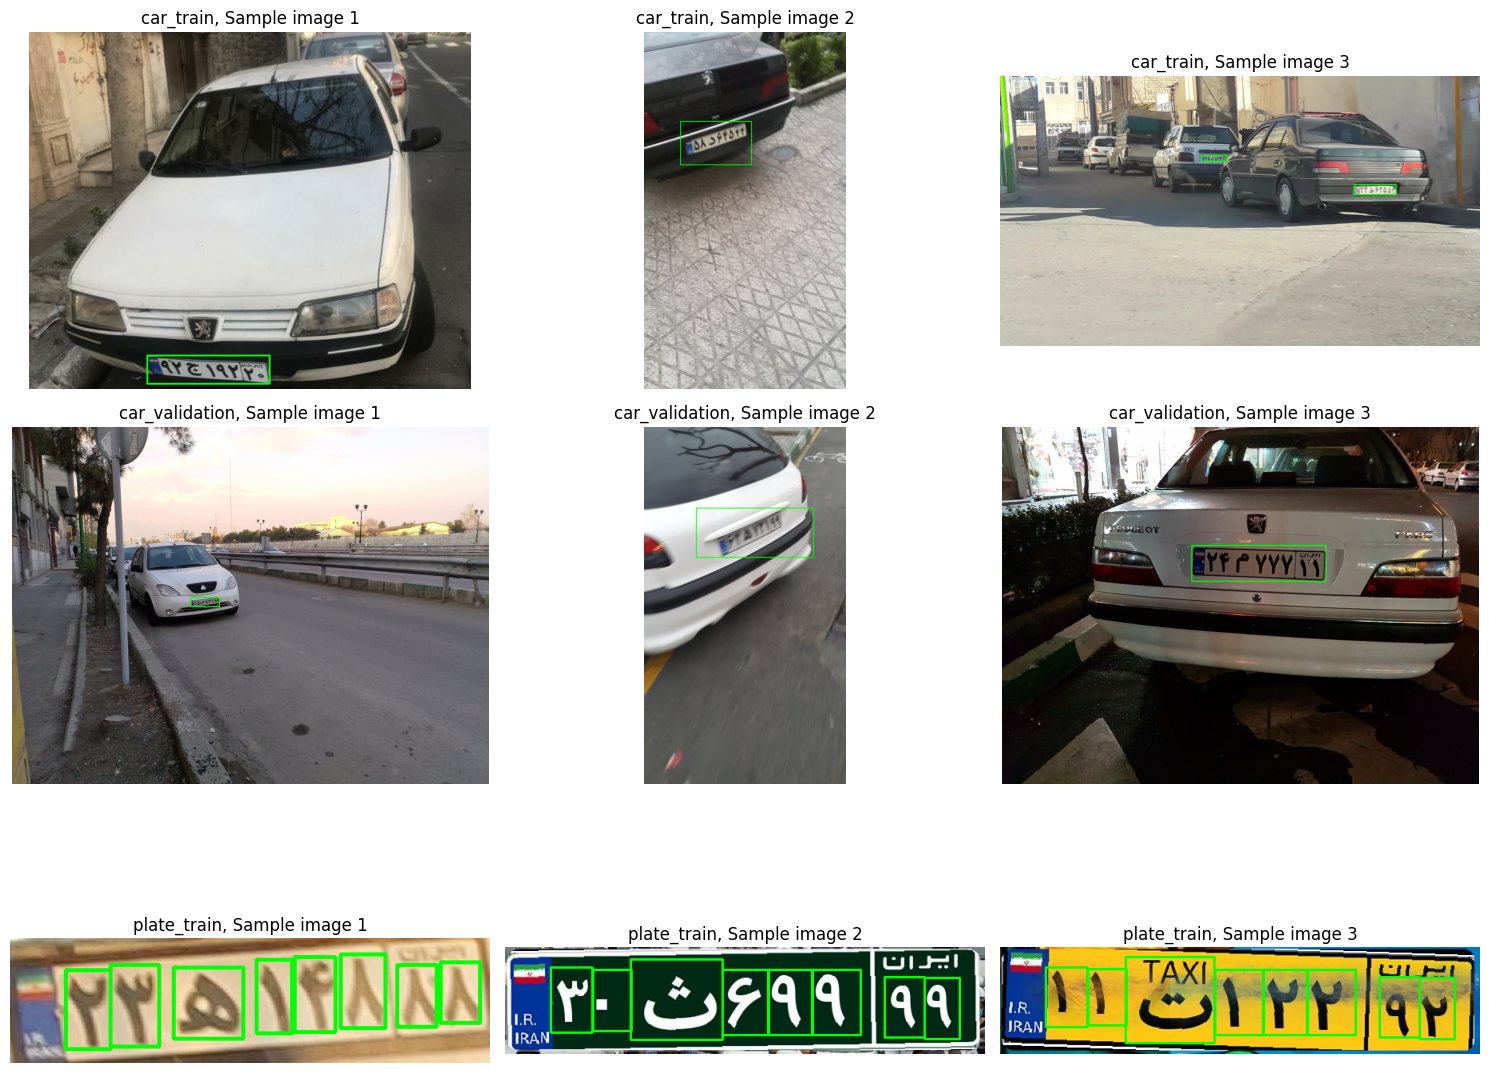

In [ ]:
# Randomly select and examine samples from all datasets
def visualize_datasets(dataset_paths):
    plt.figure(figsize=(15, 12))
    for dataset_idx, dataset_path in enumerate(dataset_paths):
        images_dir = os.path.join(dataset_path, 'images')
        labels_dir = os.path.join(dataset_path, 'labels')
        folder_name = os.path.basename(os.path.dirname(dataset_path))       # Get folder name from path

        # Selecting random image to display
        image_files = [f for f in os.listdir(images_dir) if f.endswith(('.jpg'))]
        if len(image_files) >= 3:
            selected_images = random.sample(image_files, 3)

            for img_idx, img_file in enumerate(selected_images):
                img_path = os.path.join(images_dir, img_file)
                img = cv2.imread(img_path)
                img_height, img_width = img.shape[:2]
                label_file = os.path.splitext(img_file)[0] + '.txt'
                label_path = os.path.join(labels_dir, label_file)

                if os.path.exists(label_path):
                    with open(label_path, 'r') as f:
                        for line in f.readlines():
                            class_id, x_center, y_center, width, height = map(float, line.strip().split())

                            # Skip based on folder and class
                            if dataset_path in ['/content/car_train/test', '/content/car_validation/validation']:
                                if class_id != 0:  # Only show class 0
                                    continue
                            elif dataset_path == '/content/plate_train/train':
                                if class_id == 0:  # Skip class 0
                                    continue

                            # Coordinates to pixels
                            x_center_px = int(x_center * img_width)
                            y_center_px = int(y_center * img_height)
                            width_px = int(width * img_width)
                            height_px = int(height * img_height)

                            # Coordinates
                            x1 = int(x_center_px - width_px/2)
                            y1 = int(y_center_px - height_px/2)
                            x2 = int(x_center_px + width_px/2)
                            y2 = int(y_center_px + height_px/2)

                            # Drawing boundry box
                            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                plt.subplot(3, 3, dataset_idx * 3 + img_idx + 1)

                plt.imshow(img_rgb)
                plt.title(f'{folder_name}, Sample image {img_idx + 1}')
                plt.axis('off')

    plt.tight_layout()
    plt.show()


visualize_datasets(datasets)

In [ ]:
# Creating data.yaml file
data_yaml = f"""train: /content/car_train/test
val: /content/car_validation/validation

nc: {len(classes)}
names: {list(classes.keys())}"""

with open('data.yaml', 'w') as f:
    f.write(data_yaml)

print('✅ The "data.yaml" file has been created successfully')

✅ The "data.yaml" file has been created successfully


In [ ]:
# Download the YOLOv11 weights
weights_dir = os.path.join(os.getcwd(), "weights")
os.makedirs(weights_dir, exist_ok=True)

urls = [
    "https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11n.pt",
    "https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11s.pt",
    "https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11m.pt",

]

for url in urls:
    file_name = os.path.join(weights_dir, os.path.basename(url))
    urllib.request.urlretrieve(url, file_name)
    print(f"✅ Downloaded successfully {file_name}")

✅ Downloaded successfully /content/weights/yolo11n.pt
✅ Downloaded successfully /content/weights/yolo11s.pt
✅ Downloaded successfully /content/weights/yolo11m.pt


In [ ]:
# Define YOLOv11 model process
models = {
    'nano': '/content/weights/yolo11n.pt',
    # 'small': '/content/weights/yolov11s.pt',      # Beyond our capabilities due to GPU limitation
    # 'medium': '/content/weights/yolov11m.pt'      # Beyond our capabilities due to GPU limitation
}

# Base training parameters
base_params = {
    'data': '/content/data.yaml',
    'project': '/content/drive/MyDrive/Colab Notebooks',    # Saving directory
    'name': 'ANPR_model',
    'save_period': 10,
    'classes': [0],     # Detect only first class
    'epochs': 50,
    'imgsz': 640,
    'batch': 64,
    'patience': 10,
    'device': 0,
    'pretrained': True,
    'seed': 0,
    'optimizer': 'AdamW',
    'verbose': True,
    'save': True,
    'plots': True,
    'amp': True,
    # Augmentation
    'hsv_h': 0.015,
    'hsv_s': 0.7,
    'hsv_v': 0.4,
    'translate': 0.1,
    'scale': 0.7,
    'fliplr': 0.5,
    'mosaic': 0.5,
    'mixup': 0.1,
    # Regularization
    'cos_lr': True,
    'lr0': 0.001,
    'lrf': 0.01,
    'weight_decay': 0.001  # L2
}

# Dictionary to store results
model_results = {}

# Train and evaluate each model
for model_name, model_path in models.items():
    print(f"\n🔃 Training {model_name} model...")

    # Initialize model
    model = YOLO(model_path)

    # Train model
    results = model.train(**base_params)

    # Evaluate model
    val_results = model.val()

    # Store results
    model_results[model_name] = {
        'mAP': val_results.box.map,
        'mAP50': val_results.box.map50,
        'mAP75': val_results.box.map75,
        'recall': val_results.box.r,
        'precision': val_results.box.p
    }

    # Save model
    model.save(f'best_model_{model_name}.pt')


🔃 Training nano model...
Ultralytics 8.3.77 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/weights/yolo11n.pt, data=/content/data.yaml, epochs=50, time=None, patience=10, batch=64, imgsz=640, save=True, save_period=10, cache=False, device=0, workers=8, project=/content/drive/MyDrive/Colab Notebooks, name=ANPR_model5, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=[0], retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_con

100%|██████████| 22.2M/22.2M [00:00<00:00, 227MB/s]


Overriding model.yaml nc=80 with nc=40

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/car_train/test/labels... 4176 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4176/4176 [00:04<00:00, 946.88it/s]


train: New cache created: /content/car_train/test/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/car_validation/validation/labels... 2120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2120/2120 [00:01<00:00, 1125.22it/s]


val: New cache created: /content/car_validation/validation/labels.cache
Plotting labels to /content/drive/MyDrive/Colab Notebooks/ANPR_model5/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/Colab Notebooks/ANPR_model5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.12G      1.913      6.943       1.69        119        640:   6%|▌         | 4/66 [00:04<01:08,  1.10s/it]


100%|██████████| 755k/755k [00:00<00:00, 84.7MB/s]
       1/50      9.14G      1.339      2.379      1.095         33        640: 100%|██████████| 66/66 [02:11<00:00,  1.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:40<00:00,  2.39s/it]

                   all       2120       2494      0.369      0.428      0.398      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.55G      1.183       0.88      0.989         21        640: 100%|██████████| 66/66 [02:26<00:00,  2.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:42<00:00,  2.52s/it]

                   all       2120       2494      0.908      0.748       0.85      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.61G      1.156     0.8136      0.985         37        640: 100%|██████████| 66/66 [02:29<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:42<00:00,  2.51s/it]

                   all       2120       2494      0.893      0.808      0.871      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.61G      1.148     0.7689     0.9911         21        640: 100%|██████████| 66/66 [02:32<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:40<00:00,  2.40s/it]

                   all       2120       2494       0.92      0.866      0.914      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.55G      1.106     0.7234     0.9825         30        640: 100%|██████████| 66/66 [02:25<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:40<00:00,  2.38s/it]

                   all       2120       2494      0.921      0.875      0.919      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.61G      1.075     0.6943     0.9726         27        640: 100%|██████████| 66/66 [02:33<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:40<00:00,  2.37s/it]

                   all       2120       2494       0.93      0.886      0.925      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       8.6G      1.039     0.6527     0.9584         32        640: 100%|██████████| 66/66 [02:28<00:00,  2.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:40<00:00,  2.39s/it]

                   all       2120       2494      0.934      0.877      0.921      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.59G       1.04     0.6507     0.9606         30        640: 100%|██████████| 66/66 [02:32<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:41<00:00,  2.45s/it]

                   all       2120       2494      0.907      0.884      0.928      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       8.6G      1.033     0.6455     0.9592         36        640: 100%|██████████| 66/66 [02:17<00:00,  2.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:40<00:00,  2.37s/it]

                   all       2120       2494       0.92        0.9      0.929      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.59G     0.9976     0.6102     0.9469         28        640: 100%|██████████| 66/66 [02:26<00:00,  2.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:39<00:00,  2.30s/it]

                   all       2120       2494      0.926      0.893      0.934      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       8.6G      1.004     0.6101     0.9416         17        640: 100%|██████████| 66/66 [02:32<00:00,  2.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:38<00:00,  2.28s/it]

                   all       2120       2494      0.934      0.895      0.939      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       8.6G     0.9855     0.5999     0.9408         27        640: 100%|██████████| 66/66 [02:30<00:00,  2.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:37<00:00,  2.18s/it]

                   all       2120       2494      0.929      0.894       0.94      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       8.6G     0.9833     0.5883     0.9402         22        640: 100%|██████████| 66/66 [02:28<00:00,  2.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:37<00:00,  2.19s/it]

                   all       2120       2494      0.926      0.893      0.922      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.61G      0.975     0.5844     0.9447         26        640: 100%|██████████| 66/66 [02:22<00:00,  2.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:36<00:00,  2.16s/it]

                   all       2120       2494      0.924      0.893       0.93      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.59G     0.9707     0.5815     0.9425         30        640: 100%|██████████| 66/66 [02:21<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:37<00:00,  2.19s/it]

                   all       2120       2494      0.928      0.911      0.949      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       8.6G     0.9695     0.5774     0.9364         28        640: 100%|██████████| 66/66 [02:27<00:00,  2.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:35<00:00,  2.10s/it]

                   all       2120       2494      0.923      0.894      0.938      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       8.6G     0.9342     0.5551     0.9313         23        640: 100%|██████████| 66/66 [02:36<00:00,  2.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:34<00:00,  2.00s/it]

                   all       2120       2494      0.946      0.891       0.95      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.59G     0.9382     0.5514     0.9286         27        640: 100%|██████████| 66/66 [02:30<00:00,  2.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:32<00:00,  1.93s/it]

                   all       2120       2494      0.929      0.891      0.935      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       8.6G     0.9451     0.5477     0.9243         35        640: 100%|██████████| 66/66 [02:33<00:00,  2.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:35<00:00,  2.08s/it]

                   all       2120       2494      0.936      0.902       0.95      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       8.6G     0.9335     0.5454     0.9259         32        640: 100%|██████████| 66/66 [02:39<00:00,  2.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:34<00:00,  2.02s/it]

                   all       2120       2494       0.93      0.918      0.952      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       8.6G      0.924     0.5346     0.9198         27        640: 100%|██████████| 66/66 [02:45<00:00,  2.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:34<00:00,  2.04s/it]

                   all       2120       2494      0.929      0.911       0.95      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.55G      0.922     0.5335      0.923         18        640: 100%|██████████| 66/66 [02:50<00:00,  2.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:32<00:00,  1.93s/it]

                   all       2120       2494      0.927      0.907      0.941      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.61G      0.917     0.5312     0.9273         34        640: 100%|██████████| 66/66 [02:44<00:00,  2.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:34<00:00,  2.01s/it]

                   all       2120       2494      0.931      0.916      0.957      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       8.6G     0.8983     0.5188     0.9147         36        640: 100%|██████████| 66/66 [02:51<00:00,  2.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:33<00:00,  2.00s/it]

                   all       2120       2494      0.931      0.911      0.948      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.58G      0.895     0.5076     0.9165         21        640: 100%|██████████| 66/66 [02:42<00:00,  2.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:35<00:00,  2.08s/it]

                   all       2120       2494      0.939      0.899      0.949      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.58G     0.8908     0.5106     0.9096         34        640: 100%|██████████| 66/66 [02:50<00:00,  2.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:34<00:00,  2.04s/it]

                   all       2120       2494      0.938      0.903      0.952       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.59G     0.8908     0.5041     0.9187         36        640: 100%|██████████| 66/66 [02:58<00:00,  2.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:35<00:00,  2.11s/it]

                   all       2120       2494      0.947      0.918      0.959      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       8.6G       0.87     0.4971     0.9045         36        640: 100%|██████████| 66/66 [03:05<00:00,  2.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:34<00:00,  2.05s/it]

                   all       2120       2494      0.927      0.912      0.947      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.59G     0.8701     0.4902     0.9073         29        640: 100%|██████████| 66/66 [02:49<00:00,  2.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:36<00:00,  2.16s/it]

                   all       2120       2494      0.929       0.91      0.952      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       8.6G      0.867     0.4905     0.9076         35        640: 100%|██████████| 66/66 [03:01<00:00,  2.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:34<00:00,  2.06s/it]

                   all       2120       2494       0.94      0.915      0.955      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.55G     0.8564     0.4785     0.9066         28        640: 100%|██████████| 66/66 [02:56<00:00,  2.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:34<00:00,  2.04s/it]

                   all       2120       2494      0.942      0.906      0.954      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       8.6G     0.8643     0.4808     0.9045         31        640: 100%|██████████| 66/66 [03:10<00:00,  2.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:34<00:00,  2.04s/it]

                   all       2120       2494      0.942      0.911      0.959      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       8.6G     0.8473     0.4639     0.9008         39        640: 100%|██████████| 66/66 [02:45<00:00,  2.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:38<00:00,  2.25s/it]

                   all       2120       2494      0.935      0.925      0.961      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       8.6G     0.8486     0.4746      0.903         26        640: 100%|██████████| 66/66 [03:11<00:00,  2.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:34<00:00,  2.06s/it]

                   all       2120       2494      0.936      0.925      0.962      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.59G     0.8413     0.4713      0.903         34        640: 100%|██████████| 66/66 [02:35<00:00,  2.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:34<00:00,  2.04s/it]

                   all       2120       2494      0.932      0.933      0.963      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.61G      0.833      0.458     0.8958         33        640: 100%|██████████| 66/66 [02:59<00:00,  2.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:34<00:00,  2.06s/it]

                   all       2120       2494      0.934       0.92      0.961      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       8.6G     0.8283     0.4567     0.9014         28        640: 100%|██████████| 66/66 [02:48<00:00,  2.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:33<00:00,  1.94s/it]


                   all       2120       2494       0.93      0.926      0.964       0.75

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       8.6G     0.8195       0.45     0.8982         24        640: 100%|██████████| 66/66 [03:05<00:00,  2.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:32<00:00,  1.89s/it]

                   all       2120       2494      0.939      0.921      0.964      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       8.6G     0.8171     0.4445     0.8942         25        640: 100%|██████████| 66/66 [02:52<00:00,  2.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:37<00:00,  2.21s/it]

                   all       2120       2494      0.924      0.932      0.959      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.61G     0.8031     0.4312     0.8915         18        640: 100%|██████████| 66/66 [02:29<00:00,  2.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:34<00:00,  2.02s/it]

                   all       2120       2494      0.943      0.929      0.965      0.747


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.55G     0.7595     0.3991     0.8812         17        640: 100%|██████████| 66/66 [01:48<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:34<00:00,  2.04s/it]

                   all       2120       2494      0.944      0.924      0.962      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.55G     0.7527     0.3879     0.8775         22        640: 100%|██████████| 66/66 [01:42<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:32<00:00,  1.92s/it]

                   all       2120       2494      0.939       0.93      0.965      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.55G     0.7536     0.3883     0.8819         16        640: 100%|██████████| 66/66 [01:40<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:32<00:00,  1.88s/it]

                   all       2120       2494       0.94      0.929      0.967      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.55G     0.7516     0.3874     0.8806         18        640: 100%|██████████| 66/66 [01:44<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:32<00:00,  1.90s/it]

                   all       2120       2494      0.942      0.927      0.967      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.55G     0.7359     0.3768     0.8774         19        640: 100%|██████████| 66/66 [01:42<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:31<00:00,  1.86s/it]

                   all       2120       2494      0.943      0.933      0.967      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.55G     0.7347     0.3778     0.8799         18        640: 100%|██████████| 66/66 [01:41<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:33<00:00,  1.98s/it]

                   all       2120       2494      0.944      0.937      0.969      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.55G     0.7356     0.3773     0.8739         21        640: 100%|██████████| 66/66 [01:40<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:31<00:00,  1.84s/it]

                   all       2120       2494      0.946      0.934      0.967      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.55G     0.7379     0.3716      0.879         18        640: 100%|██████████| 66/66 [01:41<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:32<00:00,  1.93s/it]

                   all       2120       2494      0.946      0.936      0.967       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.55G     0.7371     0.3721      0.877         20        640: 100%|██████████| 66/66 [01:40<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:32<00:00,  1.91s/it]

                   all       2120       2494      0.945      0.931      0.966       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.55G     0.7311     0.3714     0.8736         18        640: 100%|██████████| 66/66 [01:40<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:31<00:00,  1.86s/it]

                   all       2120       2494      0.945      0.932      0.967      0.761



50 epochs completed in 2.600 hours.
Optimizer stripped from /content/drive/MyDrive/Colab Notebooks/ANPR_model5/weights/last.pt, 5.5MB
Optimizer stripped from /content/drive/MyDrive/Colab Notebooks/ANPR_model5/weights/best.pt, 5.5MB

Validating /content/drive/MyDrive/Colab Notebooks/ANPR_model5/weights/best.pt...
Ultralytics 8.3.77 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,589,952 parameters, 0 gradients, 6.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:38<00:00,  2.26s/it]


                   all       2120       2494      0.945      0.932      0.967      0.761
         کل ناحیه پلاک       2120       2494      0.945      0.932      0.967      0.761
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to /content/drive/MyDrive/Colab Notebooks/ANPR_model5
Ultralytics 8.3.77 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,589,952 parameters, 0 gradients, 6.4 GFLOPs


val: Scanning /content/car_validation/validation/labels.cache... 2120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2120/2120 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:41<00:00,  1.22s/it]


                   all       2120       2494      0.942      0.935      0.966       0.76
         کل ناحیه پلاک       2120       2494      0.942      0.935      0.966       0.76
Speed: 0.9ms preprocess, 4.7ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /content/drive/MyDrive/Colab Notebooks/ANPR_model52
